In [ ]:
import cv2
vidcap = cv2.VideoCapture('test_video.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  cv2.imwrite("test_video_frames/frame%d.jpg" % count, image)     # save frame as JPEG file
  count += 1

In [ ]:
from PIL import Image
project_video_frames = glob.glob('project_video_frames/*png')
count = 0
for img_src in project_video_frames:
    filename = "project_video_frames/frame%d.jpg" % count # save frame as JPEG file
    print(filename)
    img = Image.open(img_src)
    img.save(filename, "JPEG")
    count += 1

In [ ]:
import glob
import cv2
import numpy as np
import matplotlib.image as mpimg
project_video_frames = glob.glob('project_video_frames/*jpg')
project_video_frame = project_video_frames[0]
project_video_frame_image = mpimg.imread(project_video_frame)
print(project_video_frame_image.shape)
scale = 2
project_video_frame_image_resized = cv2.resize(project_video_frame_image,
                                               (np.int(project_video_frame_image.shape[1]/scale),
                                                np.int(project_video_frame_image.shape[0]/scale)))
print(project_video_frame_image.shape)
print(project_video_frame_image_resized.shape)

In [ ]:
bestx = 819
bestw = 2

minx = int(bestx - bestw/2)
maxx = int(bestx + np.ceil(bestw/2) + 1)

a = range(minx, maxx)
for b in a:
    print(b)

In [ ]:
import random

x = random.randint(0,9)
y = random.randint(0,9)
rangex = [p for p in range(x,x+9)]
rangey = [p for p in range(y,y+9)]

x = random.randint(0,9)
y = random.randint(0,9)
xpixels = [p for p in range(x,x+9)]
ypixels = [p for p in range(y,y+9)]

print(sorted(rangex))
print(sorted(xpixels))
print()
print(sorted(rangey))
print(sorted(ypixels))

resultx = len(list(set(rangex) & set(xpixels)))
resulty = len(list(set(rangey) & set(ypixels)))

print(resultx)
print(resulty)

print((resultx+resulty)/(len(rangex)+len(rangey)))
#print(resultx/len(rangex))

In [ ]:
import imageio
import os, sys
 
def convertFile(inputpath, targetFormat):
    outputpath = os.path.splitext(inputpath)[0] + '_cropped' + targetFormat
    print("converting\r\n\t{0}\r\nto\r\n\t{1}".format(inputpath, outputpath))

    reader = imageio.get_reader(inputpath)
    fps = reader.get_meta_data()['fps']

    writer = imageio.get_writer(outputpath, fps=fps)
    for i,im in enumerate(reader):
        sys.stdout.write("\rframe {0}".format(i))
        sys.stdout.flush()
        y=350
        h=16*22
        x=600
        w=16*45
        writer.append_data(im[y:y+h, x:x+w])
    print("\r\nFinalizing...")
    writer.close()
    print("Done.")

convertFile("../examples/spatial_binning_animation.mp4", ".mp4")

In [ ]:
from moviepy.editor import *

clip = (VideoFileClip("../examples/spatial_binning_animation_cropped.mp4"))
clip.write_gif("../examples/spatial_binning_animation.gif")

(2, 2, 3)
[[[254 170 180]
  [ 73  92  75]]

 [[ 36 254 247]
  [253 141 156]]]


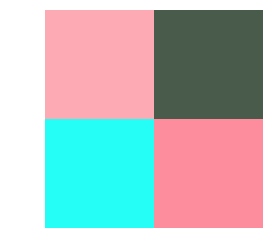

(2, 6)
[[254  73 170  92 180  75]
 [ 36 253 254 141 247 156]]


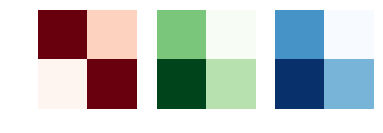

(1, 12)
[[254  73 170  92 180  75  36 253 254 141 247 156]]


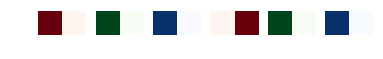

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.uint8(x*256)
f = np.vectorize(f)

feature_image = f(np.random.random((2, 2, 3)))

print(feature_image.shape)
print(feature_image)

plt.imshow(feature_image)
plt.axis('off')
plt.show()

ch0_bins = feature_image[:,:,0]
ch1_bins = feature_image[:,:,1]
ch2_bins = feature_image[:,:,2]

features = np.hstack((ch0_bins, ch1_bins, ch2_bins))

print(features.shape)
print(features)

plt.subplot(131)
plt.axis('off')
plt.imshow(ch0_bins, cmap='Reds')
plt.subplot(132)
plt.axis('off')
plt.imshow(ch1_bins, cmap='Greens')
plt.subplot(133)
plt.axis('off')
plt.imshow(ch2_bins, cmap='Blues')
plt.show()

feature_flat = np.array([features.ravel()])

print(feature_flat.shape)
print(feature_flat)

plt.subplot(161)
plt.axis('off')
plt.imshow([ch0_bins[0]], cmap='Reds')
plt.subplot(162)
plt.axis('off')
plt.imshow([ch1_bins[0]], cmap='Greens')
plt.subplot(163)
plt.axis('off')
plt.imshow([ch2_bins[0]], cmap='Blues')
plt.subplot(164)
plt.axis('off')
plt.imshow([ch0_bins[1]], cmap='Reds')
plt.subplot(165)
plt.axis('off')
plt.imshow([ch1_bins[1]], cmap='Greens')
plt.subplot(166)
plt.axis('off')
plt.imshow([ch2_bins[1]], cmap='Blues')
plt.show()